<a href="https://colab.research.google.com/github/bouracha/deeplearning/blob/master/18071890_DL_CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning: Coursework 2

------------------------------------------------------

**Student Name:**  <Anthony Bourached> (Student Number: <18071890> )

**Start date:** *4th March 2019*

**Due date:** *18th March 2019, 09:00 am*

------------------------------------------------------


## How to Submit

When you have completed the exercises and everything has finished running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_cw2.ipynb** before the deadline above.

Please produce a **pdf** with all the **results** (tables and plots) as well as the **answers** to the questions below. For this assignment, you don't need to include any of the code in the pdf, but answers to the questions should be self-contained and should not rely on a code reference.  Page limit: 15 pg. 

### IMPORTANT
Please make sure your submission includes **all results/answers/plots/tables** required for grading. We should not have to re-run your code.

## Q1: Memory Mechanisms (30 pts)

Before going deeper into your practical tasks, take some time to revise and make sure you understand recurrent models (Vanilla RNN) and the two of major types of recurrent memory cells you will be using in this assignment: Long-Short Term Memory Units (LSTM) first introduced by Hochreiter and Schmidhuber [1997] and the more recent Gated Recurrent Units (GRU) by Cho et al. [2014].

---------------------------------------------------

### Models
For convenience and to standardize notation please use the following notations:

#### Vanilla RNN Model Eq.

A simple RNN model we will be considering here is given by:

$$h_t = \tanh(W_h [h_{t-1}, x_t] + b_h)$$
$$o_t = \sigma(W_o h_t + b_o)$$

#### LSTM Model Eq.

The LSTM models we will be considering are given by: 
* For the input, forget and outputs gates are: 

$$f_t = \sigma(W_f [h_{t-1}, x_t] + b_f)$$
$$i_t = \sigma(W_i [h_{t-1}, x_t] + b_i)$$
$$o_t = \sigma(W_o [h_{t-1}, x_t] + b_o)$$

* The internal state $c_t$ and hidden state $h_t$ are:

$$c_t = f_t * c_{t-1} +  i_t * \text{tanh}(W_c[h_{t-1}, x_t] + b_c) $$
$$h_t = o_t * \text{tanh}(c_t)$$

#### GRU Model Eq.
The GRU models we will be considering are given by:

* The gates modulation $r_t$, $z_t$:
$$z_t = \sigma(W_z [h_{t-1}, x_t] + b_z)$$
$$r_t = \sigma(W_r [h_{t-1}, x_t] + b_r)$$

* The output and hidden state are now being given by:

$$\tilde{h}_t = \text{tanh}(W_h [(h_{t-1} * r_t), x_t] + b_h)$$
$$h_t = (1 - z_t)*\tilde{h}_t + z_t * h_{t-1}$$

---------------------------------
### Simple Memory Task Description
Consider the following memory task: Given an input sequence of $n$ numbers, we would like a system that, after reading this sequence (one number at a time) will always return the first number in the sequence. That is given an input sequence: $(x_1, x_2, \cdots x_n)$, $x_i \in \mathbb{R}$ the system has to return, at time $t=n$ after 'reading' the last input $x_n$, the first input $x_1$.

---------------------------------

###Questions
Now consider the following questions:

1. Given the task above, consider the above recurrent models (RNNs/LSTMs/GRUs). Which of these arhitectures can (theoretically) perfom the task above? In answering this questions, please consider a simple one-layer model of RNNs/GRU/LSTM with a one-dimensional input $x_t$, a $32$-dim hidden and output layer, followed by a transformation to a one-dimensional final output which should predict $x_0$. \\
Whenever the answer is positive, give the gates' activations and weigths that will produce the desired behaviour. Whenever the answer is no, prove that there exists no such parameters that an arbitrary input sequence can be transformed to produce the first symbol read.  [15 pts]

2. How does the answer change when now the desired output, after reading the whole sequence, is the 3rd input $x_3$ rather than $x_1$? Assume here $n>3$. [5 pts]

3. How does the answer change when you restrict the inputs to be integers between $0$ and $31$ and we consider representing these inputs as a one-hot vectors uniquely representing these numbers? That is: for $x_i=0$, the input of the network would be $\tilde{x}=[1,0,0,
\cdots, 0]$, for $x_i=1$, the input of the network would be $\tilde{x}=[0,1,0,0,\cdots, 0]$ and now predicted output should be $\tilde{x}$. [5 pts]

4. Are GRUs a special case of LSTMs? If so, give the expression of the GRU gates in term of LSTM's gates ($o_t, i_t, f_t$). If not, give a counter-example. This is a general question, not specific to the task above, although you can draw intution from the above questions. Assume here the same input. [5 pts]

**Word limit: ** 1500 words or less





**Answers:** 
1. We have a 32 dimensional output layer which we can convert through a non-linear function to our one dimensional output. Thus we can reduce the problem to one in which we want to make the output layer the same at each timestep and determined completely only by x1 and unchanged by all other timestep inputs. Thus we shall consider, for each model whether we can satisfy the above condition. 

-RNN: Our output vector is given by: $o_t = \sigma(W_o h_t + b_o)$ to make this determined only by $x_1$ we need $h_t$ determined only by $x_1$. So consider: $h_t = \tanh(W_{hh} h_{t-1} + W_{hx} x_t + b_h)$. For $t=1$ we need this term to be wholly determined by the $W_{hx} x_t$ term however for $t>1$ we need it wholly determined by the $W_{hh} h_{t-1}$ term. Since the weights are shared for each timestep, this is impossible. Thus it's a no for the RNN.

-LSTM: Our output vector is given by a function of $h_t = o_t * \text{tanh}(c_t)$. Following a similar argument from above we need this output to be determined solely by the first input $x_1$. Thus we need to do this using the forget and update gates $f_t$ and $i_t$ respectively. For $t=1$ we want $c_t = f_t * c_{t-1} +  i_t * \text{tanh}(W_c[h_{t-1}, x_t] + b_c) $ to be solely determined by $\text{tanh}(W_c[h_{t-1}, x_t] + b_c)$ and at $t>1$ we want $c_t$ to be solely determined by $c_{t-1}$. Thus we want $f_t$ to be 0 on the first iteration and 1 thereafter and vice versa for $i_t$. We can achieve this for $f_t$ by setting $b_f$ to very large values, $W_f$ to a matrix of 1s and $h_{t-1}$ to a vector of very very large negative values. Since $h_{t-1}$ is updated at the end of the first iteration $W_f [h_{t-1}, x_t]$ will only dominate for the first iteration after which $b_f$ will dominate. This is achieved similarly in the update gate $i_t$ by setting $b_i$ to a very large negative value and $W_i$ to a matrix of -1. Since we have already set $h_0$ above $(W_i [h_{t-1}, x_t] + b_i)$ will be a very large positive number for the first iteration and then very large negative thereafter hence achieving our aim. We would additionally like $o_t=1$ for all $t$ which can be achieve with a zero $W_o$ matrix and a large positive bias $b_o$. Finally we require $W_c$ to be 0 for neurons corresponding to $h_{t-1}$ and 1 for those corresponding to $x_t$ and for $b_c$ to be zero. Our final output will then be $y_T = \text{tanh}(\text{tanh}(x_1))$.

 -GRU: We have $O_t = g(h_t)$ for some function g. We need $h_t = (1 - z_t)*\tilde{h}_t + z_t * h_{t-1}$ to be only a function of $x_1$, thus since $\tilde{h_t}$ is a function of $x_t$ we need it to contribute for t=1 (ie need $z_1=0$) and not contribute for all $t>1$ (ie $z_t=1$ for all $t>1$) hence $h_t=h_{t-1}$ for all $h_t$ $t>1$ and $h_1 = x_1$. This is achieved by setting $b_z$ to a very large number and setting $h_0 = - 2*b_z$. The elements of $W_z$ that multiply by $h_t$ should be 1. In this case we will have that $z_1 = 0$ and $z_t = 1$ for $t>1$ since $h_2$ will be equal to $x_1$ and no longer this large negative number. Hence enabling $z_t$ to be dominated by the large, positive values in $b_z$. We would also like to have $r_t=0$ throughout which can be achieved by setting all the elements of $W_r$ to zero and $b_r$ to a large negative number.  Finally $b_h$ should be set to a vector of zeros and $W_h$ can now be a complete matrix of ones since the relevance gates are set to zero. 
 
 2. For the case of the vanilla RNN the situation is trivially unchanged. If it is impossible to remember $x_1$ then it is impossible to remember $x_3$ where we only have a further disadvantage that we can't choose the incoming hidden representation in a favourable way. As for LSTM and GRU; it was possible in the previous case because having control over the intial hidden state enabled us to, for the first iteration, effectively set $z_t$ to a value that it wouldn't otherwise take on with the large positive bias we required to ensure that $h_t=h_{t-1}$. However since we can't insist on the values of $h_2$ or $x_2$ taking on large negative values we won't be able to insist on the $z_t$ being 0 for $t=3$ and then 1 thereafter. Thus this is now not possible without training.

3. RNNs is still impossible because of the same reason as above. However, LSTM and GRU are now also impossible since we'd have to sum over all inputs to ensure the gates open and closed the way we required as explained above. 

4. GRU is not a special case of LSTM. The reset gate in a GRU unit controls the amount of information that gets passed from the previous time step, while an LSTM unit only controls which information gets passed but not the amount. Counter-example:

Let $z_t$ = $f_t$ for the GRU unit

Then, the state update equaiton for GRU is given by  
$$h_t = (1 - z_t)*\tilde{h}_t + z_t * h_{t-1} =$$ 
$$h_t = (1 - f_t)*\text{tanh}(W_h [(h_{t-1} * r_t), x_t] + b_h) + f_t * h_{t-1}$$

The state update equation for LSTM unit is given by 
$$c_t = f_t * c_{t-1} +  i_t * \text{tanh}(W_c[h_{t-1}, x_t] + b_c) $$
$$h_t = o_t * \text{tanh}(c_t)$$

If we set $i = 1 - f_t$ and $o_t = 1$, we have 
$$c_t = f_t * c_{t-1} +  (1-f_t) * \text{tanh}(W_c[h_{t-1}, x_t] + b_c) $$
$$h_t = \text{tanh}(c_t)$$

Because of the $\text{tanh}$ activaiton for $c_t$, there is no set of settings of the gates of the LSTM unit that would produce the same state update equation as for the GRU case.
 


In [0]:
#@title IMPORTS
import tensorflow as tf
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

## Q2: Training Memory Models (33 pts)
Let us now investigate in pratice the above problem. And see how each these models does in learning the simple memory task proposed in Q1. For the purposed of this exercise we consider as inputs sequences of length $n=10$, with every input $x_i \sim \mathcal{N(0,1)}$ drawn (independently) from a unit Gaussian.


1. **[5 pts]** Consider one of the models in **Q1.1** that you now know can represent a solution to our simple memory task. For this model, you know at least one set of weights what should implement exactly the prediction of the first read symbol $x_1$. Implement this model in tensorflow, with the fixed set of weights you previously inferred and show emperically that this indeed solves our task. \\
  i) Report the (empirical) mean-squared error over $300$ randomly generated sequences. \\
  ii) Is this set of weights a fix point for the learning? 

**Answers:**




In [0]:
class GRU(object):
    def __init__(self):
        self.Wz = tf.get_variable('Wz',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bz = tf.get_variable('bz',dtype=tf.float32,shape=[1,HIDDEN_UNITS], initializer=tf.zeros_initializer())     

        self.Wr = tf.get_variable('Wr',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.br = tf.get_variable('br',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())
               
        self.h = tf.get_variable('h',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer()) 
        
        self.Wh = tf.get_variable('Wh',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bh = tf.get_variable('bh',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())        
    
    def step(self, xt):
        self.z = tf.math.sigmoid(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wz) + self.bz)
        self.r = tf.math.sigmoid(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wr) + self.br)
      
        self.xt = xt
        self.h_hat = tf.math.tanh(tf.matmul(tf.concat([tf.math.multiply(self.h, self.r), xt], axis=1), self.Wh) + self.bh)
        
        self.h = tf.math.multiply((1 - self.z), self.h_hat) + tf.math.multiply(self.z, self.h)
        return self.h
   

In [0]:
MSE_list = []
for irun in range(0, 300):
  tf.reset_default_graph()

  SEQ_LENGTH = 10
  HIDDEN_UNITS = 32

  model = GRU()

  #Set constant Weights as specified in Q1
  model.bz = tf.Variable(tf.ones([1, HIDDEN_UNITS]))*1e8
  model.h = -1e8*model.bz
  model.Wz = tf.Variable(tf.ones([HIDDEN_UNITS + 1, HIDDEN_UNITS]))
  model.br = -tf.Variable(tf.ones([1, HIDDEN_UNITS]))*1e16
  model.Wr = tf.Variable(tf.zeros([HIDDEN_UNITS + 1, HIDDEN_UNITS]))
  model.bh = tf.Variable(tf.zeros([1, HIDDEN_UNITS]))
  model.Wh = tf.Variable(tf.ones([HIDDEN_UNITS + 1, HIDDEN_UNITS]))

  dummy_input = [tf.constant([[np.random.normal()]]) for _ in range(SEQ_LENGTH)]
  for i in range(0, SEQ_LENGTH):
    h = model.step(dummy_input[i])
  y_T = tf.atanh(h)

  init = tf.global_variables_initializer()  
  with tf.train.SingularMonitoredSession() as sess:
    sess.run(init)
    sess.run(y_T)

    x1 = dummy_input[0].eval(session=sess)
    y = y_T.eval(session=sess)
    
    MSE_list.append((y[0, 0] - x1[0, 0])**2)

    print("Original input: ", x1[0, 0])
    print("Output at time T: ", y[0, 0])
  
print("MSE over 300 runs = ", np.mean(MSE_list))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Original input:  -0.16184743
Output at time T:  -0.1618474
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Original input:  -0.047278836
Output at time T:  -0.047278833
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Original input:  0.01307555
Output at time T:  0.013075549
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Original input:  -0.3216964
Output at time T:  -0.32169637
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Original input:  -0.7257447
Output at time T:  -0.7257448
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done runnin

As can be seen at the bottomof the the previous window the MSE over 300 runs is 2.3603402507973064e-13 ( effectively zero). This is a fixed point for learning since the loss is effectovely zero and therefore the rate of the change of the loss w.r.t. each parameter is zero.

2. **[10 pts] ** Consider the following models, with standard initializations (tensorflow defaults), except a few bias terms as specified below:
  * MM1: RNN bias term $b_h = 0$
  * MM2: LSTM with $b_f = 1$ 
  * MM3: LSTM with $b_f = 5$
  * MM4: LSTM with $b_f = -2$
  * MM5: GRU with  $b_z = 5$

  Implement each of these models in tensorflow. Given the initialization conditions above, compute and plot the following gradients as a function of time: the gradient of the last hidden unit $h_T$, where $T=n$ which respect to the previous hidden units $h_t$ for $t < T$.

  $$ \left\Vert \frac{\partial h_T}{\partial h_t} \right\Vert_1 = \sum_i \left| \frac{\partial h_T[i]}{\partial h_t} \right|$$  
  and the gradient of the loss which respect to the hidden units over time $h_t$, for $t<T$:
    $$ \left\Vert \frac{\partial Loss}{\partial h_t} \right\Vert_1$$  
where the $Loss$ we are considering here is the mean-squares error: $Loss(\textbf{x}) = (x_1-y_T)^2$ where $y_T$ is the output of the reccurent model at time $T=n$ after reading the last input $x_n$.

  **[3 pts] ** Now consider an additional model:
  * MM0: LSTM with $b_f = 1000$ and $b_c = -50$. 

  Report and plot the same gradients as above. What do you observe? What does this model correspond to? (Hint: How does the information flow when processing a sequence). What will be its behaviour in training?

  **[5 pts] ** Increase the length of the input sequence to $n=25$. How do the above gradients change? (you can see by an argument or by running the experiments and explain what you see). How do you expect the training to progress in all of these models MM0-5?  

**Answers:**

In [0]:
class MM0(object):
    def __init__(self):
        initbf = tf.constant_initializer(1000.0)
        initbc = tf.constant_initializer(-50.0)
        self.Wf = tf.get_variable('Wf_mm0',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bf = tf.get_variable('bf_mm0',dtype=tf.float32,shape=[1,HIDDEN_UNITS], initializer=initbf)     

        self.Wi = tf.get_variable('Wi_mm0',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bi = tf.get_variable('bi_mm0',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())

        self.Wo = tf.get_variable('Wo_mm0',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bo = tf.get_variable('bo_mm0',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())

        self.Wc = tf.get_variable('Wc_mm0',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bc = tf.get_variable('bc_mm0',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=initbc)

        self.c = tf.get_variable('c_mm0',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer()) 
        self.h = tf.get_variable('h_mm0',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())      
    
    def step(self, xt):
        self.f = tf.math.sigmoid(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wf) + self.bf)
        self.i = tf.math.sigmoid(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wi) + self.bi)
        self.o = tf.math.sigmoid(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wo) + self.bo)
        
        self.c = tf.math.multiply(self.f, self.c) +  tf.math.multiply(self.i, tf.math.tanh(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wc) + self.bc))   
        
        self.h = tf.math.multiply(self.o, tf.math.tanh(self.c))
        return self.h

In [0]:
class MM1(object):
    def __init__(self):
        self.Wh = tf.get_variable('Wh_mm1',dtype=tf.float32,shape=[HIDDEN_UNITS + 1,HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bh = tf.get_variable('bh_mm1',dtype=tf.float32,shape=[1,HIDDEN_UNITS], initializer=tf.zeros_initializer())
        self.Wo = tf.get_variable('Wo_mm1',dtype=tf.float32,shape=[HIDDEN_UNITS,HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bo = tf.get_variable('bo_mm1',dtype=tf.float32,shape=[1,HIDDEN_UNITS], initializer=tf.zeros_initializer())
        self.h = tf.get_variable('h_mm1',dtype=tf.float32,shape=[1,HIDDEN_UNITS], initializer=tf.zeros_initializer())
    
    def step(self, xt):
        self.h = tf.math.tanh(tf.matmul(tf.concat([self.h, xt], 1), self.Wh) + self.bh)
        return tf.math.sigmoid(tf.matmul(self.h, self.Wo) + self.bo)  

In [0]:
class MM2(object):
    def __init__(self):
        init = tf.constant_initializer(1.0)
        self.Wf = tf.get_variable('Wf_mm2',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bf = tf.get_variable('bf_mm2',dtype=tf.float32,shape=[1,HIDDEN_UNITS], initializer=init)     

        self.Wi = tf.get_variable('Wi_mm2',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bi = tf.get_variable('bi_mm2',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())

        self.Wo = tf.get_variable('Wo_mm2',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bo = tf.get_variable('bo_mm2',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())

        self.Wc = tf.get_variable('Wc_mm2',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bc = tf.get_variable('bc_mm2',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())

        self.c = tf.get_variable('c_mm2',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer()) 
        self.h = tf.get_variable('h_mm2',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())      
    
    def step(self, xt):
        self.f = tf.math.sigmoid(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wf) + self.bf)
        self.i = tf.math.sigmoid(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wi) + self.bi)
        self.o = tf.math.sigmoid(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wo) + self.bo)
        
        self.c = tf.math.multiply(self.f, self.c) +  tf.math.multiply(self.i, tf.math.tanh(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wc) + self.bc))   
        
        self.h = tf.math.multiply(self.o, tf.math.tanh(self.c))
        return self.h

In [0]:
class MM3(object):
    def __init__(self):
        init = tf.constant_initializer(5.0)
        self.Wf = tf.get_variable('Wf_mm3',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bf = tf.get_variable('bf_mm3',dtype=tf.float32,shape=[1,HIDDEN_UNITS], initializer=init)     

        self.Wi = tf.get_variable('Wi_mm3',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bi = tf.get_variable('bi_mm3',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())

        self.Wo = tf.get_variable('Wo_mm3',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bo = tf.get_variable('bo_mm3',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())

        self.Wc = tf.get_variable('Wc_mm3',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bc = tf.get_variable('bc_mm3',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())

        self.c = tf.get_variable('c_mm3',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer()) 
        self.h = tf.get_variable('h_mm3',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())      
    
    def step(self, xt):
        self.f = tf.math.sigmoid(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wf) + self.bf)
        self.i = tf.math.sigmoid(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wi) + self.bi)
        self.o = tf.math.sigmoid(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wo) + self.bo)
        
        self.c = tf.math.multiply(self.f, self.c) +  tf.math.multiply(self.i, tf.math.tanh(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wc) + self.bc))   
        
        self.h = tf.math.multiply(self.o, tf.math.tanh(self.c))
        return self.h

In [0]:
class MM4(object):
    def __init__(self):
        init = tf.constant_initializer(-2.0)
        self.Wf = tf.get_variable('Wf_mm4',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bf = tf.get_variable('bf_mm4',dtype=tf.float32,shape=[1,HIDDEN_UNITS], initializer=init)     

        self.Wi = tf.get_variable('Wi_mm4',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bi = tf.get_variable('bi_mm4',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())

        self.Wo = tf.get_variable('Wo_mm4',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bo = tf.get_variable('bo_mm4',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())

        self.Wc = tf.get_variable('Wc_mm4',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bc = tf.get_variable('bc_mm4',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())

        self.c = tf.get_variable('c_mm4',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer()) 
        self.h = tf.get_variable('h_mm4',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())      
    
    def step(self, xt):
        self.f = tf.math.sigmoid(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wf) + self.bf)
        self.i = tf.math.sigmoid(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wi) + self.bi)
        self.o = tf.math.sigmoid(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wo) + self.bo)
        
        self.c = tf.math.multiply(self.f, self.c) +  tf.math.multiply(self.i, tf.math.tanh(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wc) + self.bc))   
        
        self.h = tf.math.multiply(self.o, tf.math.tanh(self.c))
        return self.h

In [0]:
class MM5(object):
    def __init__(self):
        init = tf.constant_initializer(5.0)
        self.Wz = tf.get_variable('Wz_mm5',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bz = tf.get_variable('bz_mm5',dtype=tf.float32,shape=[1,HIDDEN_UNITS], initializer=init)     

        self.Wr = tf.get_variable('Wr_mm5',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.br = tf.get_variable('br_mm5',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())
               
        self.h = tf.get_variable('h_mm5',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer()) 
        
        self.Wh = tf.get_variable('Wh_mm5',dtype=tf.float32,shape=[HIDDEN_UNITS + 1, HIDDEN_UNITS], initializer=tf.contrib.layers.xavier_initializer())
        self.bh = tf.get_variable('bh_mm5',dtype=tf.float32,shape=[1, HIDDEN_UNITS], initializer=tf.zeros_initializer())        
    
    def step(self, xt):
        self.z = tf.math.sigmoid(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wz) + self.bz)
        self.r = tf.math.sigmoid(tf.matmul(tf.concat([self.h, xt], axis=1), self.Wr) + self.br)
      
        self.h_hat = tf.math.tanh(tf.matmul(tf.concat([tf.math.multiply(self.h, self.r), xt], axis=1), self.Wh) + self.bh)
        
        self.h = tf.math.multiply((1 - self.z), self.h_hat) + tf.math.multiply(self.z, self.h)
        return self.h

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


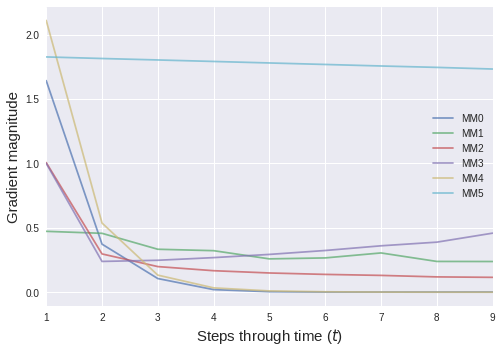

In [0]:
tf.reset_default_graph()

SEQ_LENGTH = 10 #@param
HIDDEN_UNITS = 32 #@param
index_input_to_remember = 0 #@param
derivative = 'loss' #@param

# dummy input sequence
dummy_input = [tf.constant([[np.random.normal()]]) for _ in range(SEQ_LENGTH)] 

rnn_types = {
    'MM0': MM0,
    'MM1': MM1,
    'MM2': MM2,
    'MM3': MM3,
    'MM4': MM4,
    'MM5': MM5
}

depths = {rnn_type: [] for rnn_type in rnn_types} # [9, 8, 7, 6, 5, 4, 3, 2, 1]
grad_norms = {rnn_type: [] for rnn_type in rnn_types}

for rnn_type in rnn_types:

  # --------------------------------------
  # Construct model rnn_types[rnn_type]
  model = rnn_types[rnn_type]()
  # --------------------------------------
  # Pass input and unroll in time. 
  # i) Record the intermediate hidden states $h_i$ in rnn_hidden_at_time
  rnn_hidden_at_time = []

  rnn_hidden_at_time.append(model.h)
  for i in range(1, SEQ_LENGTH):
    hT = model.step(dummy_input[i])
    rnn_hidden_at_time.append(model.h)
    
  # ii) Record the last hidden unit and the last output on which we are going to 
  # make the prediction
  last_hidden = rnn_hidden_at_time[-1]
  hidden_last_output = hT
  
  # Transformation of the RNN output into prediction
  w = tf.Variable(tf.contrib.layers.xavier_initializer()([HIDDEN_UNITS, 1]))
  b = tf.Variable(tf.contrib.layers.xavier_initializer()([1]))
  model_output = tf.matmul(hidden_last_output, w) + b

  loss = tf.reduce_mean(
    tf.square(model_output-dummy_input[index_input_to_remember]))

  gradients_at_time = []
  for i in range(1, SEQ_LENGTH):
    if derivative == 'loss':
      current_gradient = tf.gradients(
        loss, 
        rnn_hidden_at_time[i],   
      )
    else:
      current_gradient = tf.gradients(
        last_hidden, 
        rnn_hidden_at_time[i],   
      )
    gradients_at_time.append(current_gradient)

  
  init = tf.global_variables_initializer()  
  with tf.train.SingularMonitoredSession() as sess:
    sess.run(init)
    gradients = sess.run(gradients_at_time)

  for gid, grad in enumerate(gradients):
    depths[rnn_type].append(len(gradients)-gid)    
    grad_norms[rnn_type].append(np.linalg.norm(grad))

plt.figure()
for rnn_type in depths:
  plt.plot(depths[rnn_type], grad_norms[rnn_type],
           label="%s" % rnn_type, alpha=0.7)
plt.legend()  
plt.ylabel("Gradient magnitude", fontsize=15)
plt.xlabel("Steps through time ($t$)", fontsize=15)
plt.xlim((1, SEQ_LENGTH-1))
plt.show()

  MM0: LSTM with $b_f = 1000$ and $b_c = -50$. Since we have that effectively (given this initialisation): $c_t =  c_{t-1} +  i_t * (-1) $ We have that the magnitude of the gradient can only decrease for later in the sequence.

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


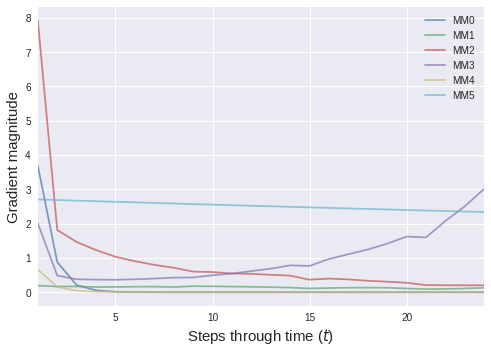

In [0]:
tf.reset_default_graph()

SEQ_LENGTH = 25 #@param
HIDDEN_UNITS = 32 #@param
index_input_to_remember = 0 #@param
derivative = 'loss' #@param

# dummy input sequence
dummy_input = [tf.constant([[np.random.normal()]]) for _ in range(SEQ_LENGTH)] 

rnn_types = {
    'MM0': MM0,
    'MM1': MM1,
    'MM2': MM2,
    'MM3': MM3,
    'MM4': MM4,
    'MM5': MM5
}

depths = {rnn_type: [] for rnn_type in rnn_types} # [9, 8, 7, 6, 5, 4, 3, 2, 1]
grad_norms = {rnn_type: [] for rnn_type in rnn_types}

for rnn_type in rnn_types:

  # --------------------------------------
  # Construct model rnn_types[rnn_type]
  model = rnn_types[rnn_type]()
  # --------------------------------------
  # Pass input and unroll in time. 
  # i) Record the intermediate hidden states $h_i$ in rnn_hidden_at_time
  rnn_hidden_at_time = []

  rnn_hidden_at_time.append(model.h)
  for i in range(1, SEQ_LENGTH):
    hT = model.step(dummy_input[i])
    rnn_hidden_at_time.append(model.h)
    
  # ii) Record the last hidden unit and the last output on which we are going to 
  # make the prediction
  last_hidden = rnn_hidden_at_time[-1]
  hidden_last_output = hT
  
  # Transformation of the RNN output into prediction
  w = tf.Variable(tf.contrib.layers.xavier_initializer()([HIDDEN_UNITS, 1]))
  b = tf.Variable(tf.contrib.layers.xavier_initializer()([1]))
  model_output = tf.matmul(hidden_last_output, w) + b

  loss = tf.reduce_mean(
    tf.square(model_output-dummy_input[index_input_to_remember]))

  gradients_at_time = []
  for i in range(1, SEQ_LENGTH):
    if derivative == 'loss':
      current_gradient = tf.gradients(
        loss, 
        rnn_hidden_at_time[i],   
      )
    else:
      current_gradient = tf.gradients(
        last_hidden, 
        rnn_hidden_at_time[i],   
      )
    gradients_at_time.append(current_gradient)

  
  init = tf.global_variables_initializer()  
  with tf.train.SingularMonitoredSession() as sess:
    sess.run(init)
    gradients = sess.run(gradients_at_time)

  for gid, grad in enumerate(gradients):
    depths[rnn_type].append(len(gradients)-gid)    
    grad_norms[rnn_type].append(np.linalg.norm(grad))

plt.figure()
for rnn_type in depths:
  plt.plot(depths[rnn_type], grad_norms[rnn_type],
           label="%s" % rnn_type, alpha=0.7)
plt.legend()  
plt.ylabel("Gradient magnitude", fontsize=15)
plt.xlabel("Steps through time ($t$)", fontsize=15)
plt.xlim((1, SEQ_LENGTH-1))
plt.show()

Although there is a lot of variance of results between different runs. MM3 has the tendancy to have very high gradients for later in the sequence. This is because effectively $c_t = 1.0 * c_{t-1} +  i_t * \text{tanh}(W_c[h_{t-1}, x_t] + b_c) $ which will make it increase later in the sequence since $c_t$ is positive.

 3. **[10 pts]** Based on the intuitions in the last questions, pick two models (one GRU model, one LSTM model) to train the simple memory task of remembering the first input of a sequence.
   * Explain your choice of models and initializations.
   * Train your models on this task and plot your train and testing loss (mean-sq. error).
   * Report (test) accuracy at end of training.
    * Comment on the results you obtained. What happens if we were to increase $n$? What we happen if we trained longer? What if we were trying to predict the $3rd$ symbol read?

  **Inputs**: $\textbf{x} = (x_1, x_2, ..., x_n)$ where $x_i \sim \mathcal{N(0,1)}$ (independently drawn) \\

  **Output (expected)**: $x_1$

  **Training**: 
    * Data: Generate $32*200$ random sequences of length $n=5$ for training and $256$ ones for testing.  
    * Recommended hyperparameters: learning rate $lr=1e-3$, minibatch size = $32$, optimizer = Adam. (Feel free to manipulate these to get the best performance).
 

**Answers:**

In [0]:
def make_sequences(m, SEQ_LENGTH):
  random_sequences = np.array([[[np.random.normal()] for _ in range(SEQ_LENGTH)] for __ in range(m)])
  return random_sequences

m_train = 32*200
m_test = 32*8

train_sequences = make_sequences(m_train, SEQ_LENGTH)
test_sequences = make_sequences(m_test, SEQ_LENGTH)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


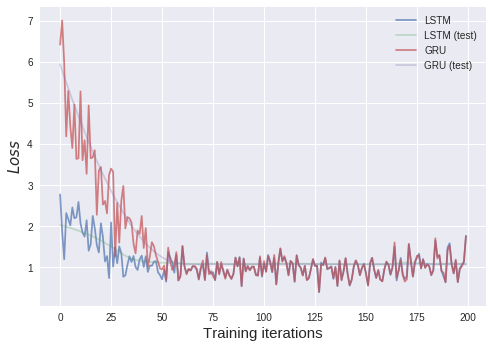

In [48]:
tf.reset_default_graph()

SEQ_LENGTH = 10 
HIDDEN_UNITS = 32
index_input_to_remember = 0 
derivative = 'loss'
BATCH_SIZE = 32 
NUM_BATCH = 200

GRU_bias = tf.constant_initializer(np.concatenate([np.zeros(HIDDEN_UNITS), np.zeros(HIDDEN_UNITS), 5*np.ones(HIDDEN_UNITS)]))

rnn_types = {
    'LSTM': tf.keras.layers.LSTMCell(HIDDEN_UNITS, unit_forget_bias=True),
    'GRU': tf.keras.layers.GRUCell(HIDDEN_UNITS, bias_initializer = MM5_bias)
}

train_loss = {
    'LSTM': [],
    'GRU': []
}

test_loss = {
    'LSTM': [],
    'GRU': []
}

x = tf.placeholder('float', [None, SEQ_LENGTH, 1])
y = tf.placeholder('float', [None])
x_unstacked = tf.unstack(x, SEQ_LENGTH, 1)

for rnn_type in rnn_types:
  model = rnn_types[rnn_type]
  #rnn_hidden_at_time = []

  # Pass input and unroll in time. 
  outputs, _ = tf.nn.static_rnn(model,x_unstacked,dtype=tf.float32)

  # Transformation of the RNN output into prediction
  w = tf.Variable(tf.contrib.layers.xavier_initializer()([HIDDEN_UNITS, 1]))
  b = tf.Variable(tf.contrib.layers.xavier_initializer()([1]))
  y_T = tf.matmul(outputs[-1], w) + b

  loss = tf.reduce_mean(tf.square(y_T-y))

  optimizer = tf.train.AdamOptimizer(learning_rate=1e-03).minimize(loss)

  init = tf.global_variables_initializer()  
  with tf.train.SingularMonitoredSession() as sess:
    sess.run(init)
    for batch in range(0, m_train//BATCH_SIZE):
      batch_xs = train_sequences[batch*BATCH_SIZE : (batch+1)*BATCH_SIZE, :, :]
      batch_y = np.squeeze(batch_xs[:, index_input_to_remember])    
      sess.run(optimizer, feed_dict={x:batch_x,y:batch_y})
      train_loss[rnn_type].append(sess.run(loss, feed_dict={x:batch_x,y:batch_y}))
      test_x = test_sequences
      test_y = np.squeeze(test_sequences[:, index_input_to_remember])
      test_loss[rnn_type].append(sess.run(loss, feed_dict={x:test_x,y:test_y}))
      
plt.figure()
for rnn_type in train_loss:
  plt.plot(train_loss[rnn_type], label="%s" % rnn_type, alpha=0.7)
  plt.plot(test_loss[rnn_type], label="%s (test)" % rnn_type, alpha=0.3)
plt.legend()  
plt.ylabel("$ Loss$", fontsize=15)
plt.xlabel("Training iterations", fontsize=15)
#plt.xlim((1, NUM_ITERS-1))
plt.show()

In [0]:
# YOUR CODE HERE

In [0]:
# plt.figure()
# for rnn_type in train_loss:
#   plt.plot(train_loss[rnn_type],
#            label="%s" % rnn_type, alpha=0.7)
#   plt.plot(test_loss[rnn_type],
#            label="%s (test)" % rnn_type, alpha=0.3)
# plt.legend()  
# plt.ylabel("$ Loss$", fontsize=15)
# plt.xlabel("Training iterations", fontsize=15)
# plt.xlim((1, NUM_ITERS-1))
# plt.show()

## Q3: Meta-learning via LSTM-s (37 pts)
(Credits to Pedro Ortega for insipring the task and insights behind it)

### Task Description

Consider the following generative model: 
* We have $4$ symbols that will be generates from a multinomial/categorical distribution, with parameters $\textbf{p}=(p_1, p_2, p_3)$: symbol 1 is generated with probability $p_1$, symbol 2 is generated with probability $p_2$, symbol 3 with probability $p_3$.
$$X \sim Categorical(3, \textbf{p})$$

* The parameter vector $\textbf{p}$ is drawn from a Dirichlet prior: $$\textbf{p} \sim Dirichlet(\alpha)$$

We are going to use the above to generate sequences (a continuous stream of data/observations), in the following way:
* Step 1: We sample $\textbf{p}$ from the prior
* Step 2: Given this $\textbf{p}$, for $T-1$ time-steps we will generate i.i.d observations by sampling one of the $4$ symbols from the categorical distribution induced by $\textbf{p}$
$$ (X_1, X_2, \cdots X_{T-1}) , s.t. X_i \sim Categorical(3, \textbf{p})$$
* Step 3: At the end of the sequence we append a fourth symbol (RESET): $(X_1, X_2, \cdots X_T, RESET)$
* Step 4: Return to Step 1 and resample $\textbf{p}$. 
* Repeat this 'forever'.

This will give rise to a continuous stream of data, of the form: $ x_1, x_2, \cdots x_{T-1}, RESET, x_{T+1}, x_{T+2}, \cdots x_{2T}, RESET, \cdots, x_{kT+1}, x_{kT+2}, \cdots x_{(k+1)T}, RESET, \cdots$.

Note: Data generation is provided for you in the cell below. (You just need to call the minibatch function to get a sequence of this form).

### Model

We are going to consider an simple LSTM (32 units hidden state) and present this (generated) sequence of data as an input. At each time step $t$ the LSTM will receive one bit of information (gets to observe the symbol corresponding to this time step) and needs to output the probability distribution for the next symbol. Thus, at time $t$ the LSTM get as input the symbol $x_t$ and will return a probability over the next state $P(x_{t+1}| x_{t}, LSTM_{t-1})$.


### Questions

1) **Without running any experiments (5 pts)**, try to think about the following scenarios and answer these questions: 
* Consider we generate the data with $Dirichlet(\alpha)$, where $\alpha = (10.,10.,1.,)$. What do you think the LSTM model will learn, if anything? Remember we are effectively changing the prediction task, every time we are resampling the probability vector $\textbf{p}$. * Hint: Think about the distribution over $\textbf{p}$ that this prior induces. *  

* What if we consider a more uniformative prior, like $\alpha=(1.1, 1.1, 1.1)$?  



* How does this (learning ability and generalization) depend on the length of the tasks $T$ and the unrolling length on the LSTM? It might be helpful to consider the two extremes: 
i) $T=1$ (we reset the task at every time step). What should the model learn in this case?, ii) $T=\infty$ (we sample the task once and keep it forever). What should the model learn in this case? (Answer this for both previous priors)


* Does this increase or decrease the complexity of the prediction problem? What about the ability to generalize to unseen $\textbf{p}$ ?



2) **Time to check your intuitions (8 pts)** 

Implement a simple LSTM model of $32$ hidden units. This will take as input a one-hot description of the obsevation ($[1,0,0,0]$ for symbol 1. $[0,1,0,0]$ for symbol 2, $[0,0,1,0]$ for symbol 3, $[0,0,0,1]$ for the RESET symbol). This input is fed into the 32-unit LSTM and the LSTM output is processed as follows: $\textrm{Relu} \Rightarrow \textrm{Fully connected Linear Layer }\Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected Linear Layer} \Rightarrow \textrm{Output}$ . The model will be trained by cross-entropy on predicting the next symbol -- thus as opposed to the previous task, we have an output of the model at each time step that is trying to predict the next symbol.

Train the following models:
* T = 5, and T=30 with the data generated from a Dirichlet with $\alpha = (1.,10.,1.)$. Unrolling length for the LSTM = 150. Minibatch size = 64. (M1, M2)
* T = 5, and T=30 with the data generated from a Dirichlet with $\alpha = (1.3, 1.3, 1.3)$ Unrolling length for the LSTM = 150. Minibatch size = 64. (M3, M4)

Train the models for $1000$ iterations ($1000$ minibatches). Record the training and testing preformance (every 10-20 iterations). Plot the curves over training time. What do you observe? (Is this a curve smooth? Do any of them plateau?). **[2x4 pts]**


In [0]:
|#@title Generate data function

n_symbols = 4
def get_data_per_task(number_samples_per_task=10, p=None, alpha=None):
  if p == None:
    # sample task
    if alpha == None:
      p = np.random.dirichlet((1.1, 1.1, 1.1), 1)[0]
    else:
      p = np.random.dirichlet(alpha, 1)[0]
    
  p = np.append(p, [0])
  sample = np.random.multinomial(1, p, size = number_samples_per_task)
  
  sample = np.append(sample,[[0,0,0,1]], axis=0)
  return sample
  

def get_data(ntasks, nsamples_per_task, p=None, alpha=None):
  sample = []
  for task_id in range(ntasks):
    sample.append(get_data_per_task(number_samples_per_task = nsamples_per_task, p=p, alpha=alpha))
  return np.concatenate(sample)


def get_minibatch(batch_size, ntasks, nsamples_per_task, p=None, alpha=None):
  sample = get_data(batch_size*ntasks, nsamples_per_task, p=p, alpha=alpha)
  return np.reshape(sample, [batch_size, ntasks*(nsamples_per_task+1), n_symbols+1])

3) **Analysis results (10 pts)**

In this section, we will investigate what the models have actaully learnt. For this we will generate a few test sequences:
* *Test sequence 1*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (1.,10.,1.,)$.
* *Test sequence 2*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (1.3,1.3,1.3,)$.
* *Test sequence 3*: generate a test sequence that 'changes tasks' every T=5 steps, but keep sampling according to the same probability vector $\textbf{p}=(0,0,1)$ (You can use any of the extreme here).
* *Test sequence 4*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (0.2,0.2,0.2)$.

i) Test the preformance of M1 and M3 and these test sequences. In addition plot the actual prediction the models do (probability of symbols over time). This should give you more insight in what the model does. Does this correspond or contradict your previous intuitions? **[5 pts]**

ii) Repeat the same procedure for task length $T=30$ and models M2 and M4. What do you observe? How do M2 and M4 compare to each other and how to their compare to M1 and M3 (the models trained on the shorter task length). **[5 pts]**


4) **Comparison to the Bayesian update (14 pts)**


Going back to the generative process in the task description. For a given prior, for each the mini-tasks (selecting/sampling a $\textbf{p}$), one could compute the Bayesian posterior at each time step.  We start with a prior and every time we observe a symbol with update our posterior over the parameters
 $\textbf{p}$ given the data. We do this every time step, till we reach the RESET symbol which marks the end of the task. Then we start again, from the prior.
,

i) Derive the posterior update for each time step. (Hint: since the two distribution are conjugates or each other, the posterior has a closed form). **[2 pts]**

ii) Implement this posterior update and use it to infer the probabilities over the next symbol, for the previously generated test sequences. This will tell you, what the inferred probabilities would be, if we knew the structure of the model, the prior and that the reset symbol means the tasks has finished and we should reset our estimate to the prior. (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 and 4 compute the updates starting from both priors) **[5 pts]**

iii) Compare this to what the LSTM predictions are. What do you observe? What are the failure cases -- can you explain why this might happen? (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 and 4 compute the updates starting from both priors). **[7 pts]**
 
For this analysis, only consider $T=30$ and respectively models M2 and M4.
